In [ ]:
# New Analysis

* Multilevel model using BRMS, as opposed to 7 individual regression models
* 

# New Analysis

* Multilevel model using BRMS, as opposed to 7 individual regression models
* Compare fit for linear and quadratic models.
* Use posterior predictions to generate point predictions/confidence regions.


In [ ]:
###  Data Description ##
# More transformations and data recodes.....
source("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/configurations/configurations.r")
detach("package:dplyr")
library(brms)
library(tidyverse)
library(ggplot2)
library(tictoc)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)

### These are user functions
### 1990 ANES ####
data_location = "/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/clean_data/"
setwd("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/Chapters/Chapter8/Chapter6")
####
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/clean_data/pooled.auth.rda")  ### Just work from this data; everything should be here, recoded.
#####
ggtheme = theme(
        plot.title=element_text(face="bold",hjust=-.08,vjust=0,colour="#3C3C3C",size=12),
        axis.text.x=element_text(size=9,colour="#535353",face="bold"),
        axis.text.y=element_text(size=9,colour="#535353",face="bold"),
        axis.title.y=element_text(size=11,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white")) 
####
data$authoritarianism_2 = data$authoritarianism^2

tmp_dat = data[,c("vote", "authoritarianism", "authoritarianism_2",
                 "female", "age", "college", "income",
                 "jewish", "catholic", "other", "year")] %>% na.omit()
head(tmp_dat)


In [ ]:
# fit0a <- brm(vote~ female + age + college + income + jewish + 
#                  catholic + other + authoritarianism +  
#                  (1|year), 
#                  family = bernoulli(link = "logit"),
#                  data = tmp_dat, 
#                  chains = 3, cores = 4, seed = 1234, 
#                  iter = 3000)
# save(fit0a, file = "random_intercept.rda")

# fit0b <- brm(vote~ female + age + college + income + jewish + 
#                  catholic + other + authoritarianism +  
#                  (1+authoritarianism|year), 
#                  family = bernoulli(link = "logit"),
#                  data = tmp_dat, 
#                  chains = 3, cores = options(mc.cores = parallel::detectCores()), seed = 1234, 
#                  iter = 3000)
# save(fit0b, file = "random_slope.rda")

# fit1 <- brm(vote~ female + age + college + income + jewish + 
#                  catholic + other + authoritarianism + authoritarianism_2 + 
#                  (1+authoritarianism+ authoritarianism_2|year), 
#                  family = bernoulli(link = "logit"),
#                  data = tmp_dat, 
#                  chains = 3, cores = options(mc.cores = parallel::detectCores()), seed = 1234, 
#                  iter = 3000)
# save(fit1, file = "random_slope_quad.rda")


The model does take a bit to estimate -- it's not unreasonable (5-10 minutes) -- but I ended up just saving the output to avoid having to recompile in each session. The models are listed above.


In [4]:
load("random_intercept.rda")

load("random_slope.rda")

load("random_slope_quad.rda")

cat("The Random Intercept Model")
print(summary(fit0a))


cat("The Random Slope/Linear Model")
print(summary(fit0b))


cat("The Random Slope/Quadratic Model")
print(summary(fit1))

The Random Intercept Model Family: bernoulli 
  Links: mu = logit 
Formula: vote ~ female + age + college + income + jewish + catholic + other + authoritarianism + (1 | year) 
   Data: tmp_dat (Number of observations: 8327) 
Samples: 3 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup samples = 4500

Group-Level Effects: 
~year (Number of levels: 7) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.37      0.16     0.18     0.81 1.00     1264     1381

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           -0.97      0.17    -1.30    -0.62 1.00     1044     2025
female              -0.24      0.05    -0.33    -0.15 1.00     5698     3087
age                  0.58      0.10     0.37     0.78 1.00     6159     2857
college             -0.19      0.05    -0.29    -0.08 1.00     5806     3316
income               0.55      0.05     0.44     0.65

Warning message:
"There were 8 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"


 Family: bernoulli 
  Links: mu = logit 
Formula: vote ~ female + age + college + income + jewish + catholic + other + authoritarianism + (1 + authoritarianism | year) 
   Data: tmp_dat (Number of observations: 8327) 
Samples: 3 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup samples = 4500

Group-Level Effects: 
~year (Number of levels: 7) 
                                Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                       0.45      0.18     0.24     0.89 1.00
sd(authoritarianism)                1.08      0.37     0.59     2.05 1.00
cor(Intercept,authoritarianism)    -0.69      0.24    -0.96    -0.06 1.00
                                Bulk_ESS Tail_ESS
sd(Intercept)                       1157     1462
sd(authoritarianism)                1131     1409
cor(Intercept,authoritarianism)     1429     2109

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           

Warning message:
"There were 82 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"


 Family: bernoulli 
  Links: mu = logit 
Formula: vote ~ female + age + college + income + jewish + catholic + other + authoritarianism + authoritarianism_2 + (1 + authoritarianism + authoritarianism_2 | year) 
   Data: tmp_dat (Number of observations: 8327) 
Samples: 3 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup samples = 4500

Group-Level Effects: 
~year (Number of levels: 7) 
                                         Estimate Est.Error l-95% CI u-95% CI
sd(Intercept)                                0.48      0.18     0.26     0.95
sd(authoritarianism)                         1.43      0.44     0.78     2.49
sd(authoritarianism_2)                       0.72      0.43     0.16     2.03
cor(Intercept,authoritarianism)             -0.69      0.25    -0.98    -0.05
cor(Intercept,authoritarianism_2)            0.49      0.37    -0.34     0.96
cor(authoritarianism,authoritarianism_2)    -0.57      0.35    -0.97     0.26
                                 

All three models fit the data well. The fit-statistics/examining the traceplots all show convergence. One useful statistic to ascertain what model fits better is leave-one-out cross validation. It's the same as K-fold cross-validation, but instead, we estimate the model on everything except one data point and then we predict that data point. Leave-one-out cross validation supports the quadratic, random slopes/intercepts model.


In [6]:
loo(fit0a, fit0b, fit1)


Output of model 'fit0a':

Computed from 4500 by 8327 log-likelihood matrix

         Estimate   SE
elpd_loo  -5375.1 27.5
p_loo        14.9  0.2
looic     10750.1 55.0
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Output of model 'fit0b':

Computed from 4500 by 8327 log-likelihood matrix

         Estimate   SE
elpd_loo  -5269.1 30.3
p_loo        20.3  0.2
looic     10538.1 60.6
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Output of model 'fit1':

Computed from 4500 by 8327 log-likelihood matrix

         Estimate   SE
elpd_loo  -5207.3 31.8
p_loo        24.3  0.3
looic     10414.6 63.7
------
Monte Carlo SE of elpd_loo is 0.2.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Model comparisons:
      elpd_diff se_diff
fit1     0.0       0.0 
fit0b  -61.8      11.2 
fit0a -167

The best fitting model is the random intercept-random slope quadratic specification. The next best model is a random intercept-random slope linear specification. The worst model is a random intercept with fixed effects for all covariates, including authoritarianism.


# Predicted Values, Voting (1992 - 2020)

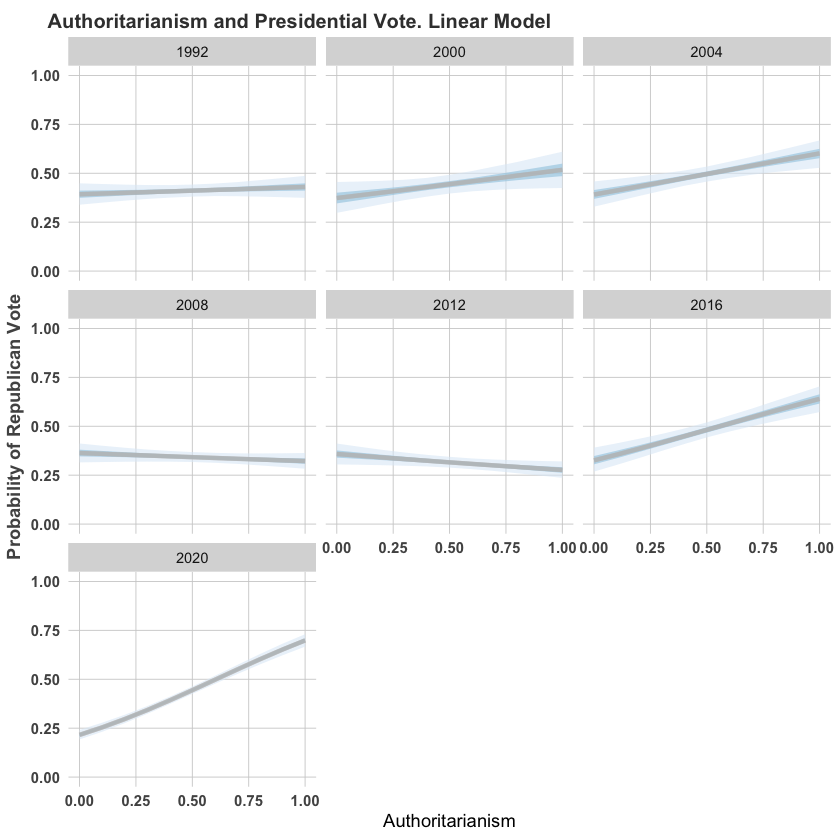

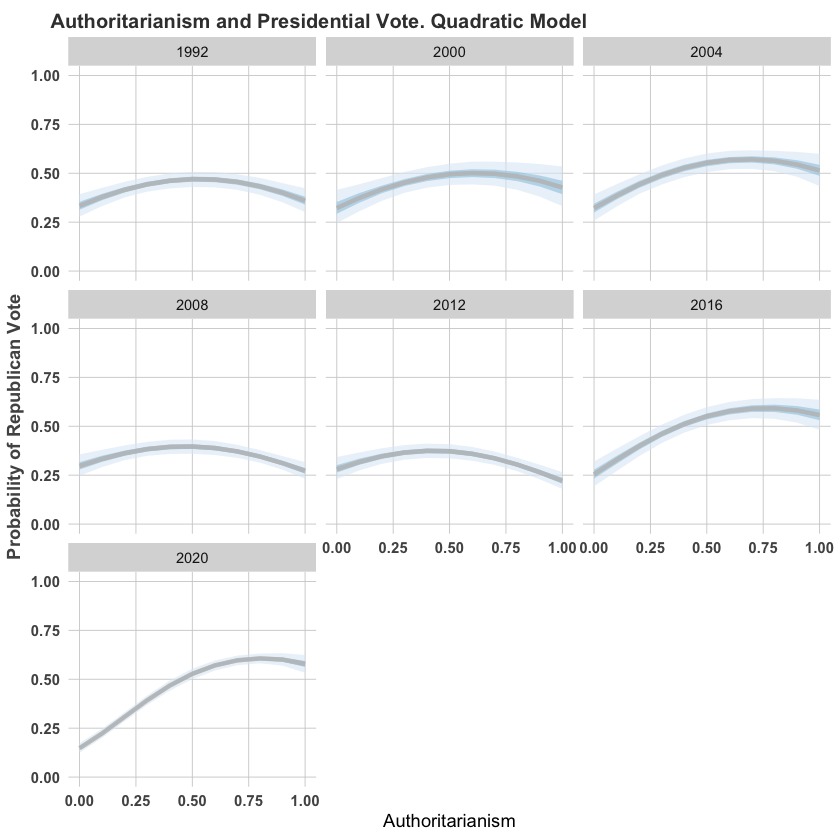

In [7]:
# Generate an expanded dataset varying levels of authoritarianism at fixed covariates.
### linear model (fit0b) ###
expanded_dat = tmp_dat %>% group_by(year) %>% data_grid(female = mean(female), age = mean(age), 
                                                      college = mean(college), income = mean(income), 
                                                      catholic =  mean(catholic), jewish = mean(jewish), 
                                                      other = mean(other), 
                                                      authoritarianism = seq_range(authoritarianism, n = 11))
model0 = expanded_dat %>%  
          add_linpred_draws(fit0b) %>% 
          mutate(Vote_Republican = plogis(.linpred))  
# Quadratic Model (Fit1)

expanded_dat = tmp_dat %>% group_by(year) %>% data_grid(female = mean(female), age = mean(age), 
                                                      college = mean(college), income = mean(income), 
                                                      catholic =  mean(catholic), jewish = mean(jewish), 
                                                      other = mean(other), 
                                                      authoritarianism = seq_range(authoritarianism, n = 11)) %>%   
                                                      mutate(authoritarianism_2 = authoritarianism^2)
model1 = expanded_dat %>%  
          add_linpred_draws(fit1) %>% 
          mutate(Vote_Republican = plogis(.linpred))   


## Plot linear Effects
 model0 %>%  ggplot(aes(x = authoritarianism)) + facet_wrap(~year) + 
      stat_lineribbon(aes(y = Vote_Republican), .width = c(.95, .5), color = "grey", alpha = 0.6) +
            scale_fill_brewer()  +
  # Format the grid
  ggtitle("Authoritarianism and Presidential Vote. Linear Model") +
  scale_y_continuous("Probability of Republican Vote", limits=c(0,1))+
  scale_x_continuous("Authoritarianism") + ggtheme +
  theme(legend.title = element_blank()) +
  theme(legend.position = "none")
  
## Plot Quadratic effects
model1 %>%  ggplot(aes(x = authoritarianism)) + facet_wrap(~year) + 
      stat_lineribbon(aes(y = Vote_Republican), .width = c(.95, .5), color = "grey", alpha = 0.6) +
      scale_fill_brewer()  +
  # Format the grid
  ggtitle("Authoritarianism and Presidential Vote. Quadratic Model ") +
  scale_y_continuous("Probability of Republican Vote", limits=c(0,1))+
  scale_x_continuous("Authoritarianism") + ggtheme + 
  theme(legend.title = element_blank()) +
  theme(legend.position = "none")


# Marginal Effects

The posterior distribution is what's used to simulate uncertainty. I just generate a linear prediction, fixing the covariates at their mean level, convert to the probability scale, and plot. To generate something akin to Average Marginal Effects, we need a point prediction for every unit in the dataset, first fixing authoritarianism to its max value and generating predictions, then fixing authoritarianism to its min value and generating the predictions. Then summarize these predictions


In [18]:

### Model to estimate AME
expanded_dat_0 = tmp_dat %>% group_by(year) %>% data_grid(female = female, age = age, 
                                                      college = college, income = income, 
                                                      catholic =  catholic, jewish = jewish, 
                                                      other = other, 
                                                      authoritarianism =  quantile(authoritarianism, 0.025)) %>% data.frame() %>%
                                                      add_linpred_draws(fit0b, draws = 1000)   %>% 
                                                      mutate(low_auth = .linpred) 
expanded_dat_1 = tmp_dat %>% group_by(year) %>% data_grid(female = female, age = age, 
                                                      college = college, income = income, 
                                                      catholic =  catholic, jewish = jewish, 
                                                      other = other, 
                                                      authoritarianism =  quantile(authoritarianism, 0.975)) %>% data.frame() %>%
                                                      add_linpred_draws(fit0b, draws = 1000)   %>% 
                                                      mutate(high_auth = .linpred) %>% select(high_auth)

expanded_dat_0$high_auth = expanded_dat_1$high_auth
expanded_dat_0$marginal = plogis(expanded_dat_0$high_auth) -  plogis(expanded_dat_0$low_auth)


Adding missing grouping variables: `year`, `female`, `age`, `college`, `income`, `catholic`, `jewish`, `other`, `authoritarianism`, `.row`


In [35]:
expanded_dat_0 %>% group_by(.row) %>% quantile(marginal, na.rm = T) %>% head()